In [16]:
%pip install ucimlrepo

In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3206 - loss: 3.9382
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3592 - loss: 3.4539 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3581 - loss: 3.2487 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3290 - loss: 3.2728
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2946 - loss: 3.3024 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3269 - loss: 2.9359
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2873 - loss: 2.9000 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3467 - loss: 2.5534
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3529 - loss: 2.3569
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3404 - loss: 2.2134
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2946 - loss: 2.2231
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3571 - 

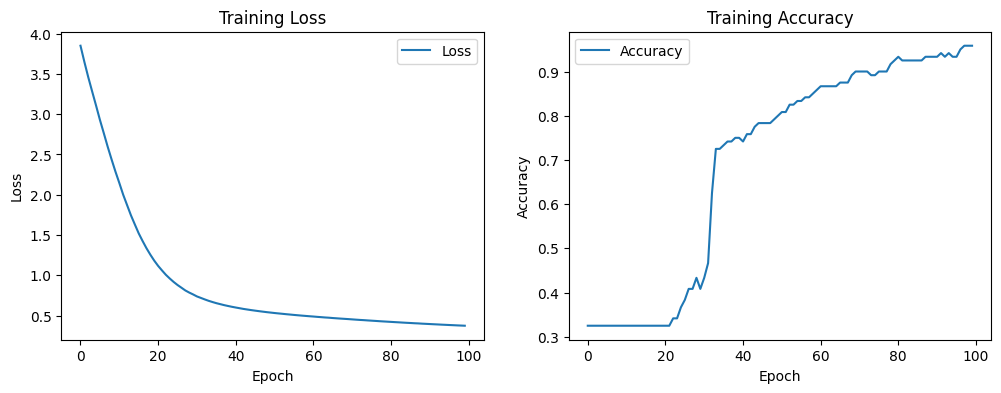

Test Loss: 0.3951
Test Accuracy: 0.9000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


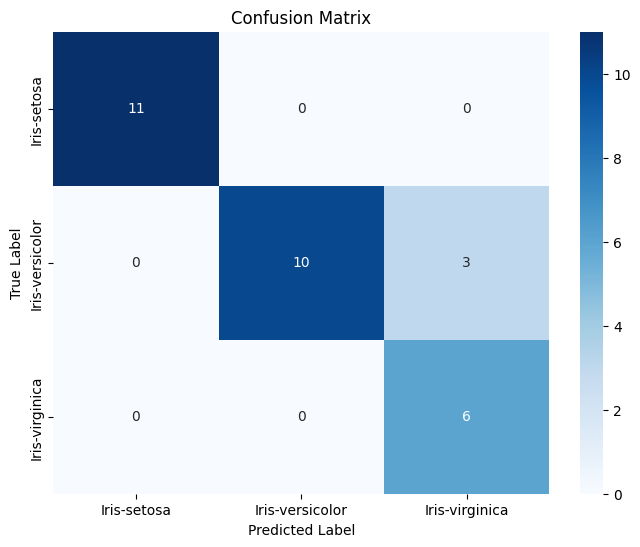

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import keras
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

# Encode the target variable
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y.values.ravel())
test_y_encoded = label_encoder.transform(test_y.values.ravel())

# Convert to one-hot encoding
train_y_categorical = to_categorical(train_y_encoded)
test_y_categorical = to_categorical(test_y_encoded)

def build_model():
  # Defining the architecture
  model = keras.Sequential([
        layers.Input(shape=[len(train_x.columns)]),
        layers.Dense(10, activation='relu'), # Hidden layer with 10 neurons and ReLU activation
        layers.Dense(len(label_encoder.classes_), activation='softmax') # Output layer with number of neurons equal to the number of classes and softmax activation
  ])

  # Defining the optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Using Adam optimizer, suitable for classification

  # Compiling the model with categorical crossentropy loss for multi-class classification
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) # Using accuracy as a metric for classification

  return model

model = build_model()
model.summary()

EPOCHS = 100

history = model.fit(
    train_x, train_y_categorical, epochs = EPOCHS, verbose = 1
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='upper left')

plt.show()

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_x, test_y_categorical, verbose=0)

# Print the evaluation results
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Predict the classes for the test data
test_predictions_probs = model.predict(test_x)

# Determine the predicted class label for each sample
test_predictions_encoded = np.argmax(test_predictions_probs, axis=1)

# Convert the predicted class indices back to original class names
test_predictions_labels = label_encoder.inverse_transform(test_predictions_encoded)

# Convert the real test class labels to a NumPy array and then to original class names
test_y_labels = test_y.values.ravel()

# Create a confusion matrix
cm = confusion_matrix(test_y_labels, test_predictions_labels, labels=label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()